In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras

In [13]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.drop(columns = ["RowNumber","CustomerId", "Surname"],axis = 1, inplace = True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# Encoding 
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [19]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [20]:
df.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)

C:\Users\PTC-SW\AppData\Local\Temp\ipykernel_9388\472971613.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':0, 'Female':1}}, inplace=True)


In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.replace({'Geography':{'France':0, 'Spain':1, 'Germany':2}}, inplace=True)

C:\Users\PTC-SW\AppData\Local\Temp\ipykernel_9388\1820602400.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':0, 'Spain':1, 'Germany':2}}, inplace=True)


In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,1,28,4,130142.79,1,1,0,38190.78,0


In [25]:
# Splitting the data into X and Y
x = df.drop(columns=["Exited"])
y = df[['Exited']]

In [26]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10


In [27]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000, 1) (2000, 1)


In [29]:
# Mandatory steps 
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.fit_transform(x_test)

In [30]:
pd.DataFrame(x_train_trf)

,0,1,2,3,4,5,6,7,8,9
0,0.169582,0.317020,1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-2.304559,1.526443,-0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-1.191196,-0.892403,1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,0.035566,0.317020,-0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,2.056114,0.317020,1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,1.526443,1.091687,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330
7996,1.478815,0.317020,1.091687,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760
7997,0.901515,-0.892403,-0.916013,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320
7998,-0.624205,0.317020,1.091687,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321


###  Build Deep neural network model by using tensorflow and keras

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()
model.add(Dense(32, activation = 'relu' , input_dim = 10))
model.add(BatchNormalization())
model.add(Dense(32,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

C:\Users\PTC-SW\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,697 (6.63 KB)

 Trainable params: 1,569 (6.13 KB)

 Non-trainable params: 128 (512.00 B)

In [35]:
history = model.fit(x_train_trf, y_train,batch_size = 50, epochs = 100, verbose = 1 , validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6778 - loss: 0.6225 - val_accuracy: 0.8219 - val_loss: 0.4808
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8027 - loss: 0.4580 - val_accuracy: 0.8338 - val_loss: 0.4061
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8192 - loss: 0.4168 - val_accuracy: 0.8444 - val_loss: 0.3787
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8319 - loss: 0.3939 - val_accuracy: 0.8487 - val_loss: 0.3666
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8394 - loss: 0.3838 - val_accuracy: 0.8456 - val_loss: 0.3630
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8408 - loss: 0.3777 - val_accuracy: 0.8475 - val_loss: 0.3605
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8461 - loss: 0.3689 - val_accuracy: 0.8487 - val_loss: 0.3598
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8469 - loss: 0.3633 - val_acc

In [36]:
model.layers[0].get_weights()

[array([[ 0.08556885, -0.26394928,  0.06107066, -0.09258705,  0.02627196,
         -0.05684138,  0.15552914,  0.03541108,  0.05809253,  0.17939505,
         -0.17938648, -0.25043514,  0.3109663 , -0.25486517, -0.21596688,
         -0.16419429,  0.09201339, -0.04807252, -0.171359  , -0.02338214,
          0.01050545,  0.18681826,  0.10710955,  0.47857448,  0.34182358,
         -0.0297255 ,  0.14271541,  0.0748176 , -0.04224973,  0.04294567,
          0.12820072, -0.0466583 ],
        [ 0.27966234, -0.05858647,  0.32559726,  0.03130881, -0.3468225 ,
         -0.04379765,  0.2713505 , -0.07510502, -0.18260922, -0.19905166,
          0.02403802, -0.01518392,  0.23943521, -0.24935308, -0.14842685,
         -0.31605202, -0.4094222 ,  0.03769602,  0.14403532, -0.42440525,
         -0.4369502 ,  0.30320072, -0.03843483,  0.15329468,  0.26609346,
         -0.25420123, -0.06375046, -0.1323405 ,  0.16458814, -0.15784271,
          0.22242858, -0.14621234],
        [ 0.09475299,  0.3671456 ,  0.36

In [44]:
y_pred = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [45]:
y_pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], shape=(2000, 1), dtype=float32)

In [47]:
y_log = model.predict(x_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [49]:
y_pred = np.where(y_log>0.5,1,0)

In [50]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(2000, 1))

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:

print("Test Accuracy",accuracy_score(y_test,y_pred))

Test Accuracy 0.8605


In [57]:
print("Classification report",classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.48      0.58       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [58]:
print("confusion matrix",confusion_matrix(y_test, y_pred))

confusion matrix [[1525   70]
 [ 209  196]]


# Visualization

In [59]:
history.history

{'accuracy': [0.6778125166893005,
  0.8026562333106995,
  0.8192187547683716,
  0.8318750262260437,
  0.8393750190734863,
  0.8407812714576721,
  0.8460937738418579,
  0.846875011920929,
  0.8470312356948853,
  0.8485937714576721,
  0.8482812643051147,
  0.8534374833106995,
  0.8526562452316284,
  0.8537499904632568,
  0.8504687547683716,
  0.856249988079071,
  0.8579687476158142,
  0.8565624952316284,
  0.8553125262260437,
  0.8582812547683716,
  0.8590624928474426,
  0.8590624928474426,
  0.8600000143051147,
  0.8646875023841858,
  0.8617187738418579,
  0.8576562404632568,
  0.8587499856948853,
  0.8614062666893005,
  0.8635937571525574,
  0.8607812523841858,
  0.8603125214576721,
  0.8587499856948853,
  0.8612499833106995,
  0.8617187738418579,
  0.8654687404632568,
  0.8617187738418579,
  0.8618749976158142,
  0.8650000095367432,
  0.864062488079071,
  0.858593761920929,
  0.8623437285423279,
  0.8621875047683716,
  0.8629687428474426,
  0.8668749928474426,
  0.8606250286102295,
  

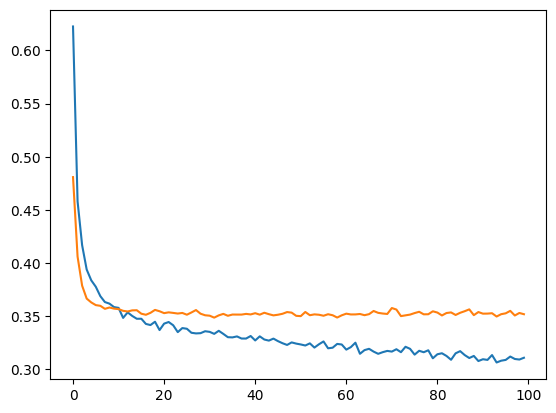

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

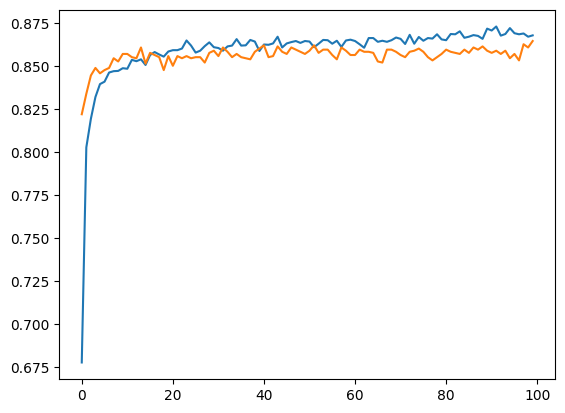

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])